<a href="https://colab.research.google.com/github/Nitesh-Nandan/Collab-Notebooks/blob/main/ml/Encoders_%5BEducative%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This collab is hands on exercise of course: Feature Engineering for Machine Learning
Link: https://www.educative.io/courses/feature-engineering-for-machine-learning

**Label Encoding:** is simply converting each value of a column to a number (Categorical Data)

## Label Encoding

In [2]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 58.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [4]:
import sklearn.preprocessing as preprocessing
import numpy as np
import pandas as pd

targets = np.array(["Sun", "Sun", "Moon", "Earth", "Monn", "Venus"])
labelenc = preprocessing.LabelEncoder()
labelenc.fit(targets)
targets_trans = labelenc.transform(targets)
print("The original data")
print(targets)
print("The transform data using LabelEncoder")
print(targets_trans)

The original data
['Sun' 'Sun' 'Moon' 'Earth' 'Monn' 'Venus']
The transform data using LabelEncoder
[3 3 2 0 1 4]


**Label Encoding with Pandas**

In [5]:
import pandas as pd

df = pd.DataFrame({"col1": ["Sun", "Sun", "Moon", "Earth", "Monn", "Venus"]})
print("The original types of DataFrame")
print(df.dtypes)
print("*"*30)

df["col1"] = df["col1"].astype("category")
print("The new types of DataFrame")
print(df.dtypes)
print("*"*30)

df["col1_label_encoding"] = df["col1"].cat.codes
print("The new column.")
print(df)

The original types of DataFrame
col1    object
dtype: object
******************************
The new types of DataFrame
col1    category
dtype: object
******************************
The new column.
    col1  col1_label_encoding
0    Sun                    3
1    Sun                    3
2   Moon                    2
3  Earth                    0
4   Monn                    1
5  Venus                    4


## One-Hot Encoding

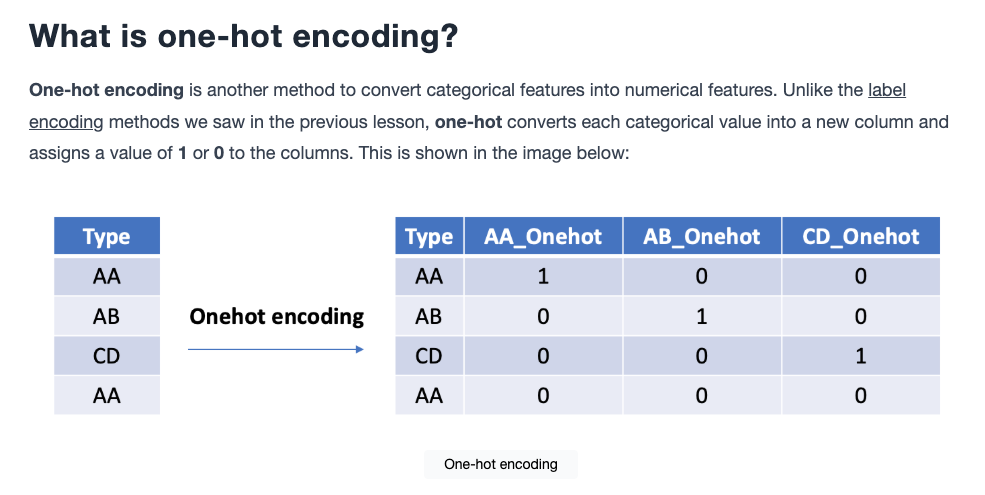

**One Hot Encoding Using Sklearn**

In [8]:
import sklearn.preprocessing as preprocessing
import numpy as np
import pandas as pd

targets = np.array(["Sun", "Sun", "Moon", "Earth", "Moon",
                    "Venus"])
labelEnc = preprocessing.LabelEncoder()
new_target = labelEnc.fit_transform(targets)

# print(new_target)
onehotEnc = preprocessing.OneHotEncoder()
onehotEnc.fit(new_target.reshape(-1, 1))
targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
print("The original data")
print(targets)
print("The transform data using OneHotEncoder")
print(targets_trans.toarray())

The original data
['Sun' 'Sun' 'Moon' 'Earth' 'Moon' 'Venus']
The transform data using OneHotEncoder
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


**One-hot encoding with pandas**

In [9]:
import pandas as pd

df = pd.DataFrame({"col1": ["Sun", "Sun", "Moon", "Earth", "Moon", "Venus"]})
print("The original data")
print(df)
print("*" * 30)
df_new = pd.get_dummies(df, columns=["col1"], prefix="Planet")
print("The transform data using get_dummies")
print(df_new)

The original data
    col1
0    Sun
1    Sun
2   Moon
3  Earth
4   Moon
5  Venus
******************************
The transform data using get_dummies
   Planet_Earth  Planet_Moon  Planet_Sun  Planet_Venus
0         False        False        True         False
1         False        False        True         False
2         False         True       False         False
3          True        False       False         False
4         False         True       False         False
5         False        False       False          True


# Count Encoding

In [11]:
import pandas as pd

df = pd.DataFrame({"col1": ["Sun", "Sun", "Moon", "Earth", "Moon", "Venus"]})
print("The original dataset")
print(df)
print("*" * 30)
df["planet_count"] = df["col1"].map(df["col1"].value_counts().to_dict())
print("The new transformed dataset.")
print(df)

The original dataset
    col1
0    Sun
1    Sun
2   Moon
3  Earth
4   Moon
5  Venus
******************************
The new transformed dataset.
    col1  planet_count
0    Sun             2
1    Sun             2
2   Moon             2
3  Earth             1
4   Moon             2
5  Venus             1
